In [1]:
import innvestigate
import innvestigate.utils
import keras.applications.vgg16 as vgg16
import keras
keras.__version__

Using TensorFlow backend.
C:\Users\varun\anaconda3\envs\iNNv\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\varun\anaconda3\envs\iNNv\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\varun\anaconda3\envs\iNNv\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\varun\anaconda3\envs\iNNv\lib\site-packag

'2.2.4'

In [2]:
# Get model
model, preprocess = vgg16.VGG16(), vgg16.preprocess_input
# Strip softmax layer
model = innvestigate.utils.model_wo_softmax(model)

In [3]:
model.layers

In [4]:
# Create analyzer
analyzer = innvestigate.create_analyzer("deep_taylor", model)

from PIL import Image
import tensorflow.keras
import numpy as np
from tensorflow.keras.preprocessing import image
baseball = 'Baseball.png'
img = image.load_img(baseball, color_mode='rgb', target_size=(224, 224))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)

display(x)

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

In [5]:
# Add batch axis and preprocess
x1 = preprocess(x)
# Apply analyzer w.r.t. maximum activated output-neuron
a = analyzer.analyze(x1)

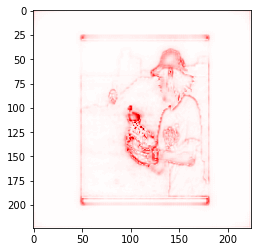

In [6]:
# Aggregate along color channels and normalize to [-1, 1]
a = a.sum(axis=np.argmax(np.asarray(a.shape) == 3))
a /= np.max(np.abs(a))
# Plot
import matplotlib.pyplot as plt
plt.imshow(a[0], cmap="seismic", clim=(-1, 1))